# Random Forest Assignment

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

### Loading Data

In [4]:
boston = datasets.load_boston()

In [6]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
targets = boston.target
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
features.shape  # checking for data shape

(506, 13)

In [17]:
features['Targets'] = boston.target  # adding targets to features table

In [18]:
features.shape

(506, 14)

In [19]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Targets
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
features.dtypes  # checking for data types 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Targets    float64
dtype: object

In [27]:
features.isnull().sum()  # checking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Targets    0
dtype: int64

In [13]:
features.describe() # description

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


As we can see there are no missing values

In [30]:
corr = features.corr()  # correlation
corr.shape

(14, 14)

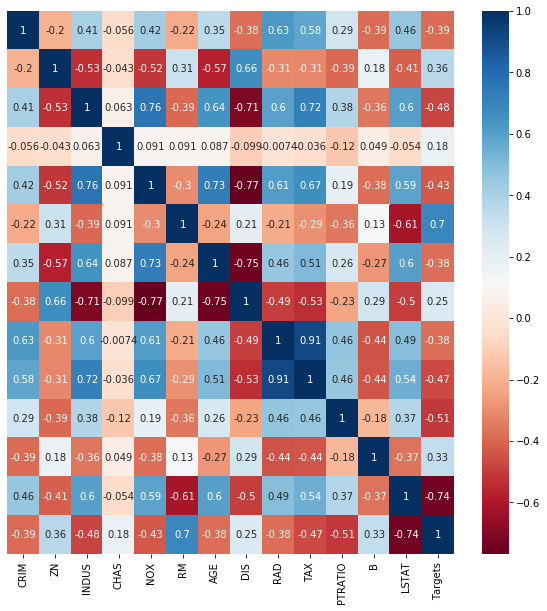

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='RdBu',yticklabels=False)

### Train_test_split

In [54]:
from sklearn.model_selection import train_test_split
X = features.drop('Targets',axis=1)
y = features['Targets']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=355)

In [55]:
print(x_train.shape)
print(y_train.shape)

(354, 13)
(354,)


### Applying Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### checking for Model score of trained & tested data

In [57]:
print(f"Train_model_score: {rfr.score(x_train,y_train)}")
print(f"Test_model_score: {rfr.score(x_test,y_test)}")

Train_model_score: 0.9786310959473837
Test_model_score: 0.8627821009991095


### By Hyper Tuning using GridSearchCV

In [58]:
grid_params = {"n_estimators" : [10,40,65,100],
              "max_depth" : range(2,20,1),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [59]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)

In [60]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
          

### Getting Best Params for the model

In [61]:
grid_search.best_params_

{'max_depth': 19,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 40}

In [62]:
rfr2 = RandomForestRegressor(n_estimators=40,max_depth=19,min_samples_leaf=1,min_samples_split=4,max_features='log2')

In [63]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
rfr2.score(x_test,y_test)

0.8586204899934562

In [65]:
y_pred = rfr2.predict(x_test)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 : 0.8586204899934562
MSE : 13.39111153610924
RMSE: 3.6593867704998386
